## Analysis of an E-commerce Dataset Part 2

## Name: Mai Vy (Vivian) Nguyen
## Student ID: 47554029

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

In [1]:
import pandas as pd
import numpy as np

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [2]:
pd.read_csv('cleaned_ecommerce_dataset.csv')

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [3]:
df=pd.read_csv('cleaned_ecommerce_dataset.csv')

In [4]:
#print total length
print('total length:',len(df))

total length: 2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful examexaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [5]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [7]:
# The correlations between helpfulness/gender/category/review and rating 
df[['helpfulness','gender','category','review','rating']].corr()

/var/folders/0_/9wkg38p56mnfzr3wb9_m9r2m0000gn/T/ipykernel_2686/1073692776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['helpfulness','gender','category','review','rating']].corr()


,helpfulness,rating
helpfulness,1.000000,-0.007523
rating,-0.007523,1.000000


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
# Convert the categorical features (i.e., gender, category and review) into numerial values
enc = OrdinalEncoder(dtype=int)
df['gender_code'] = enc.fit_transform(df[['gender']])
df['category_code'] = enc.fit_transform(df[['category']])
df['review_code'] = enc.fit_transform(df[['review']])

In [10]:
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,gender_code,category_code,review_code
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,1,8,1618
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,1,8,1125
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,1,8,2185
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,1,5,2243
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,1,5,1033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5,1,5,968
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5,1,8,920
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5,1,5,968
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5,1,1,372


In [11]:
# The correlations between helpfulness/gender/category/review and rating 
corr_helpfulness = df['helpfulness'].corr(df['rating'])
corr_gender = df['gender_code'].corr(df['rating'])
corr_category = df['category_code'].corr(df['rating'])
corr_review = df['review_code'].corr(df['rating'])

print('corr_helpfulness:', corr_helpfulness)
print('corr_gender:', corr_gender)
print('corr_category:', corr_category)
print('corr_review:', corr_review)

corr_helpfulness: -0.007523337726844546
corr_gender: -0.03433661424208265
corr_category: -0.16315765340915656
corr_review: -0.036118386552122385


#### Necessary explanation/ analysis
- Overall, the correlation between these 4 columns and rating are very weak because the values are very small. Therefore using these 4 columns as input features to predict rating should not get good result.
- The most correlated features are category (and review).
- The least correlated features are helpfulness (and gender).


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Case1: training data containing 10% of the entire data
train_case1, test_case1 = train_test_split(df, train_size=0.1, random_state=142)
print('Shape of case 1 train set:',train_case1.shape)
print('Shape of case 1 test set:',test_case1.shape)

# Case 2: training data containing 90% of the entire data
train_case2, test_case2 = train_test_split(df, train_size=0.9, random_state=142)
print('Shape of case 2 train set:', train_case2.shape)
print('Shape of case 2 test set:', test_case2.shape)

Shape of case 1 train set: (268, 14)
Shape of case 1 test set: (2417, 14)
Shape of case 2 train set: (2416, 14)
Shape of case 2 test set: (269, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [14]:
# Two most correlated input feature: 'category_code' and 'review_code'
# Two least correlated input features: 'helpfulness' and 'gender_code'

In [15]:
from sklearn import linear_model

In [16]:
# (model-a) using the training/testing data in case 1 with two most correlated input features
reg_M1 = linear_model.LinearRegression()
X_train_M1 = train_case1[['category_code','review_code']]
y_train_M1 = train_case1['rating']
X_test_M1 = test_case1[['category_code','review_code']]
y_test_M1 = test_case1['rating']
reg_M1.fit(X_train_M1, y_train_M1)

# (model-b) using the training/testing data in case 1 with two least correlated input features
reg_L1 = linear_model.LinearRegression()
X_train_L1 = train_case1[['helpfulness','gender_code']]
y_train_L1 = train_case1['rating']
X_test_L1 = test_case1[['helpfulness','gender_code']]
y_test_L1 = test_case1['rating']
reg_L1.fit(X_train_L1, y_train_L1)

# (model-c) using the training/testing data in case 2 with two most correlated input features
reg_M2 = linear_model.LinearRegression()
X_train_M2 = train_case2[['category_code','review_code']]
y_train_M2 = train_case2['rating']
X_test_M2 = test_case2[['category_code','review_code']]
y_test_M2 = test_case2['rating']
reg_M2.fit(X_train_M2, y_train_M2)

# (model-d) using the training/testing data in case 2 with two least correlated input features
reg_L2 = linear_model.LinearRegression()
X_train_L2 = train_case2[['helpfulness','gender_code']]
y_train_L2 = train_case2['rating']
X_test_L2 = test_case2[['helpfulness','gender_code']]
y_test_L2 = test_case2['rating']
reg_L2.fit(X_train_L2, y_train_L2)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
predicted_M1 = reg_M1.predict(X_test_M1)
mse_M1 = mean_squared_error(y_test_M1, predicted_M1)
rmse_M1 = np.sqrt(mse_M1)
print("Case 1 with MOST related features MSE:", mse_M1)
print("Case 1 with MOST related features RMSE:", rmse_M1)
print('\n')
predicted_L1 = reg_L1.predict(X_test_L1)
mse_L1 = mean_squared_error(y_test_L1, predicted_L1)
rmse_L1 = np.sqrt(mse_L1)
print("Case 1 with LEAST related features MSE:", mse_L1)
print("Case 1 with LEAST related features RMSE:", rmse_L1)
print('\n')
predicted_M2 = reg_M2.predict(X_test_M2)
mse_M2 = mean_squared_error(y_test_M2, predicted_M2)
rmse_M2 = np.sqrt(mse_M2)
print("Case 2 with MOST related features MSE:", mse_M2)
print("Case 2 with MOST related features RMSE:", rmse_M2)
print('\n')
predicted_L2 = reg_L2.predict(X_test_L2)
mse_L2 = mean_squared_error(y_test_L2, predicted_L2)
rmse_L2 = np.sqrt(mse_L2)
print("Case 2 with LEAST related features MSE:", mse_L2)
print("Case 2 with LEAST related features RMSE:", rmse_L2)

Case 1 with MOST related features MSE: 1.7690740179517055
Case 1 with MOST related features RMSE: 1.3300654186737229


Case 1 with LEAST related features MSE: 1.8412549895856636
Case 1 with LEAST related features RMSE: 1.356928513071217


Case 2 with MOST related features MSE: 1.7588975359805044
Case 2 with MOST related features RMSE: 1.3262343442923292


Case 2 with LEAST related features MSE: 1.8109460127732366
Case 2 with LEAST related features RMSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visualize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df_mse = pd.DataFrame({'mse':[mse_M1, mse_L1, mse_M2, mse_L2]}, index=['mse_M1','mse_L1','mse_M2','mse_L2'])

In [21]:
df_rmse = pd.DataFrame({'rmse':[rmse_M1, rmse_L1, rmse_M2, rmse_L2]}, index=['rmse_M1','rmse_L1','rmse_M2','rmse_L2'])

In [22]:
df_mse

,mse
mse_M1,1.769074
mse_L1,1.841255
mse_M2,1.758898
mse_L2,1.810946


In [23]:
df_rmse

,rmse
rmse_M1,1.330065
rmse_L1,1.356929
rmse_M2,1.326234
rmse_L2,1.345714


<BarContainer object of 4 artists>

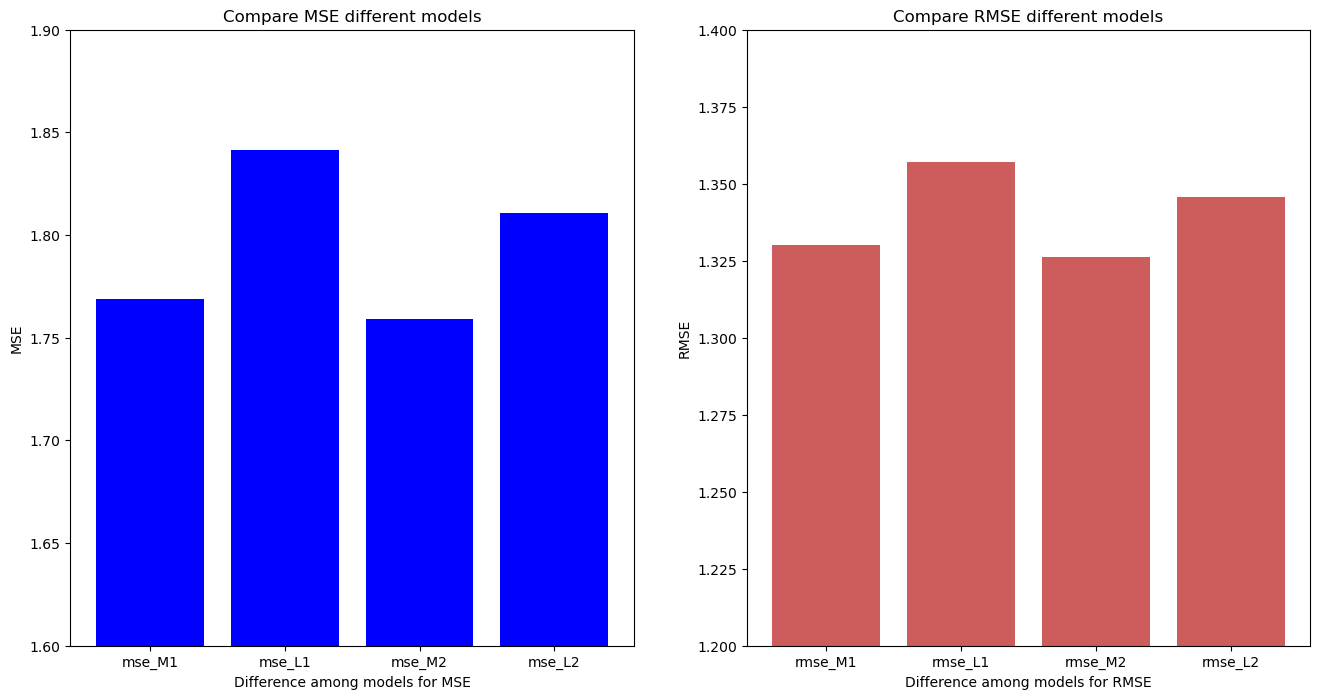

In [24]:
# Subplots
plt.figure(figsize=(16,8))

# Subplot 1: MSE
plt.subplot(1,2,1)
plt.xlabel("Difference among models for MSE")
plt.ylabel("MSE")
plt.ylim(1.6,1.9)
plt.title("Compare MSE different models")
plt.bar(data=df_mse, x=['mse_M1','mse_L1','mse_M2','mse_L2'],height='mse', color='blue')

#Subplot 2: RMSE
plt.subplot(1,2,2)
plt.xlabel("Difference among models for RMSE")
plt.ylabel("RMSE")
plt.ylim(1.2,1.4)
plt.title("Compare RMSE different models")
plt.bar(data=df_rmse, x=['rmse_M1','rmse_L1','rmse_M2','rmse_L2'],height='rmse', color='indianred')

#### Insightful analysis 
- mse_M1 > mse_M2 and mse_L1 > mse_L2: error of case 1 is larger than error of case 2, which proves that the more training data will get better results.
- mse_M1 < mse_L1 and mse_M2 < mse_L2: error of 'M' is less than error of 'L', which proves that most correlated features will get better results.
- Do you obtain similar observations? Yes, as mentioned above. But overall, the difference is quite small because all those 4 features have weak correlations with target column Rating as proved in the previous task.